In [1]:
import json
import os

from matplotlib import pyplot as plt

model_file_paths = [
    os.path.join('..', 'experiments', 'archive', 'SimpleNeuralNet2021_11_07_11_35_46_639747.json'),
    os.path.join('..', 'experiments', 'archive', 'SimpleNeuralNet2021_11_07_14_00_52_942898.json'),
    os.path.join('..', 'experiments', 'archive', 'SimpleNeuralNet2021_11_07_15_19_41_862649.json'),
    os.path.join('..', 'experiments', 'archive', 'LinearRegression2021_11_07_15_37_54_234836.json'),
    os.path.join('..', 'experiments', 'archive', 'SimpleNeuralNet2021_11_08_10_09_20_461293.json'),
]

experiments = []
for model_file_path in model_file_paths:
    with open(model_file_path) as file:
        experiment_data = json.load(file)
        experiments.append(experiment_data)
        print(experiment_data)

{'experimentName': 'SimpleNeuralNet2021_11_07_11_35_46_639747', 'modelType': 'SimpleNeuralNet', 'modelWrapper': 'SimpleNeuralNet(\n  (layers): Sequential(\n    (0): Linear(in_features=268, out_features=64, bias=True)\n    (1): ReLU()\n    (2): Linear(in_features=64, out_features=64, bias=True)\n    (3): ReLU()\n    (4): Linear(in_features=64, out_features=64, bias=True)\n    (5): ReLU()\n    (6): Linear(in_features=64, out_features=24, bias=True)\n  )\n)', 'evaluation': {'total_mape_loss': 0.025781799107789993, 'total_mase_loss': 0.4140187203884125, 'mape_losses_by_prediction_variable': {'0': 0.01622568629682064, '1': 0.01850822940468788, '2': 0.020426776260137558, '3': 0.02183186076581478, '4': 0.022551294416189194, '5': 0.023573143407702446, '6': 0.024151204153895378, '7': 0.024301322177052498, '8': 0.02538316510617733, '9': 0.02552640438079834, '10': 0.02616165019571781, '11': 0.026730265468358994, '12': 0.027434803545475006, '13': 0.02748478390276432, '14': 0.02806963585317135, '15

Compare the average losses

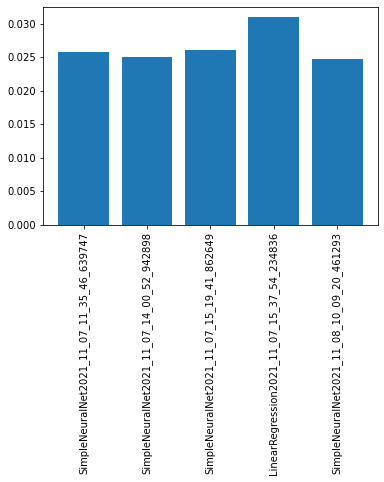

In [2]:
mape_losses = [experiment['evaluation']['total_mape_loss'] for experiment in experiments]
labels = [experiment['experimentName'] for experiment in experiments]
plt.bar(labels, mape_losses)
plt.xticks(rotation='vertical')
plt.show()

Compare the losses by prediction variable:

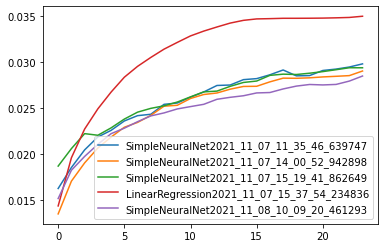

In [3]:
fig = plt.figure()
for experiment in experiments:
    mape_losses_by_predicted_variable = []
    for variable in experiment['evaluation']['mape_losses_by_prediction_variable']:
        mape_loss = experiment['evaluation']['mape_losses_by_prediction_variable'][variable]
        mape_losses_by_predicted_variable.append(mape_loss)
    plt.plot(mape_losses_by_predicted_variable, label=experiment['experimentName'])

plt.legend(loc='lower right')
plt.show()


Show the training processes:

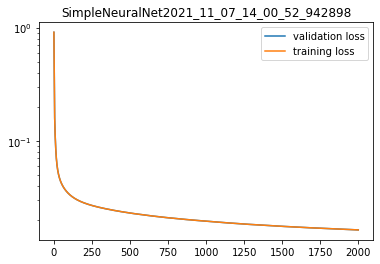

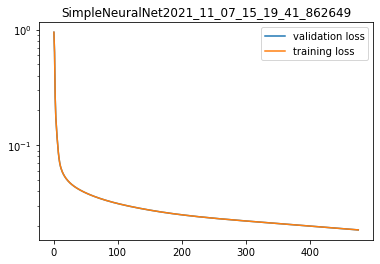

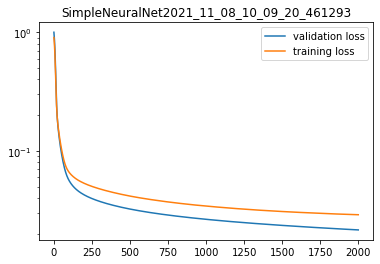

In [4]:
fig = plt.figure()
for experiment in experiments:
    if 'trainingReport' in experiment and experiment['trainingReport']:
        epochs = experiment['trainingReport']['epochs']
        validation_losses = [epoch['trainingLoss'] for epoch in epochs]
        training_losses = [epoch['validationLoss'] for epoch in epochs]
        plt.plot(validation_losses, label='validation loss')
        plt.plot(training_losses, label='training loss')
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.title(experiment['experimentName'])
        plt.show()